In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


1. Данные о недвижемости содержат информаю по 8 характеристикам недвижемости, всего 20640 записей. Пропусков в данных нет.
2. Все характеристики (переменные) имеют числовое значение (непрерывное числовое значение), тип float64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


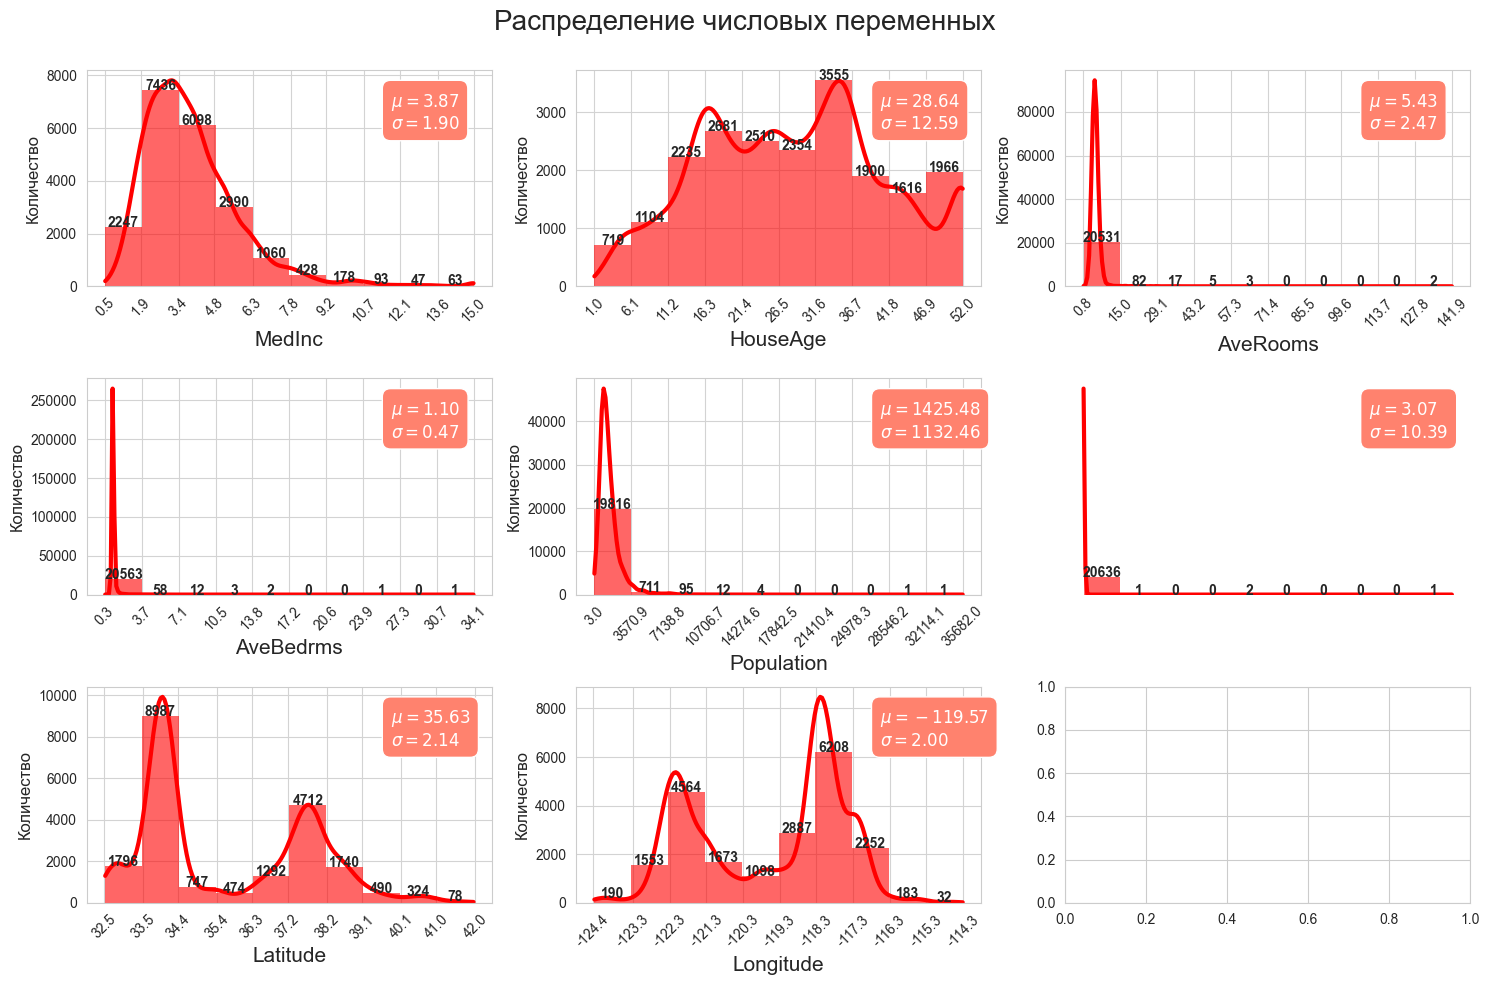

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df[col],
                                     range=(df[col].min(), df[col].max()))

    graph = sns.histplot(data=df, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df[col].mean(),
        r'$\sigma=%.2f$' % df[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

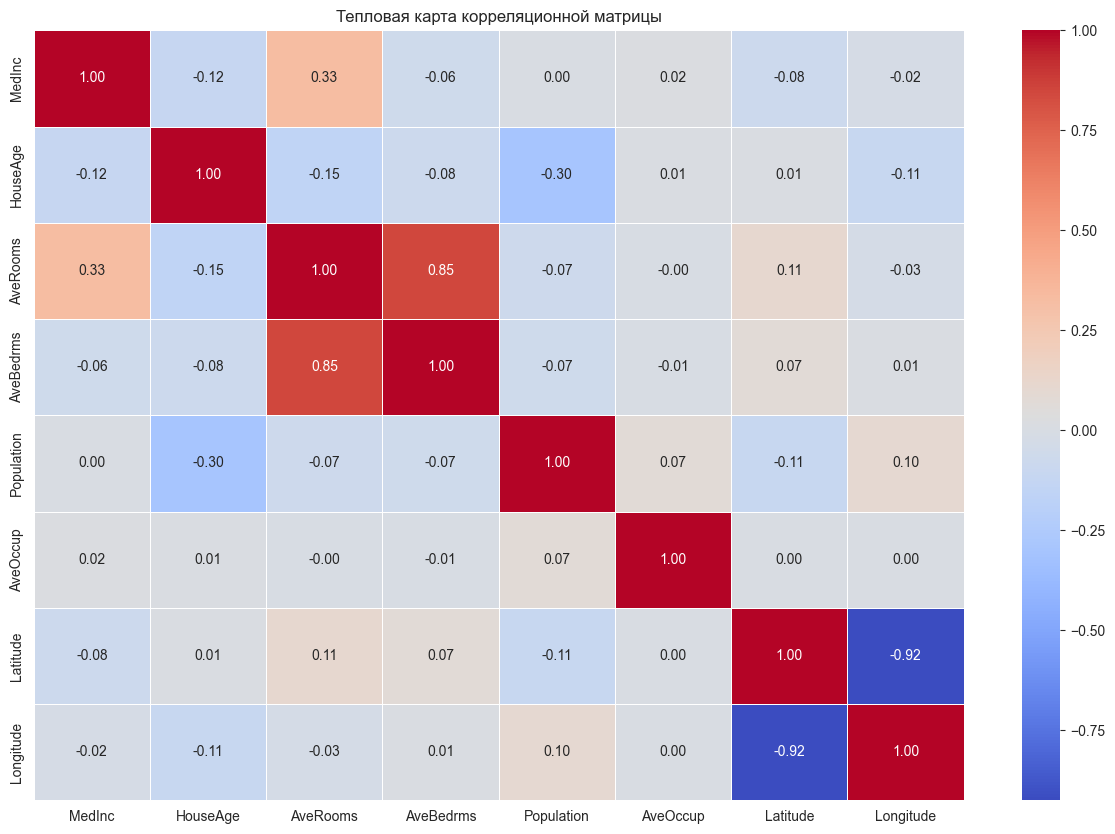

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

Из построенной матрицы корреляции видно, что сильная обратная корреляция (-0.92) существует между показателями Latitude и Longitude, поэтому вместе эти показатели лучше не использовать, из-за риска появления мультиколлиниарности. Кроме того слабая корреляция существует еще между следующими признаками MedInc и AveRooms (0.33); HouseAge и Population (-0.3)

In [8]:
#Построим модель линейной регрессии для прогнозирования цен на квартиры
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
print(f'MSE: {mean_squared_error(y_train, y_train_pred)},\
\nMAE :{mean_absolute_error( y_train, y_train_pred)},\
\n R2: {r2_score(y_train, y_train_pred)}')

MSE: 0.5179331255246699,
MAE :0.5286283596581928,
 R2: 0.6125511913966952


In [10]:
y_test_pred = lr.predict(X_test)
print(f'MSE: {mean_squared_error( y_test, y_test_pred)},\
\nMAE :{mean_absolute_error( y_test, y_test_pred)},\
\n R2: {r2_score(y_test, y_test_pred)}')

MSE: 0.555891598695244,
MAE :0.5332001304956558,
 R2: 0.5757877060324511


## Теперь построим модель классификации для данных об ирисах

In [11]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True, return_X_y=True)
df, target = data[0], data[1]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Данные содержат информаю по 4 характеристикам ириса (длина и ширина чашелистика и длина и ширина лепестка), всего 150 записей. Пропусков в данных нет. Все характеристики (переменные): имеют числовое значение (непрерывное числовое значение), тип float64.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


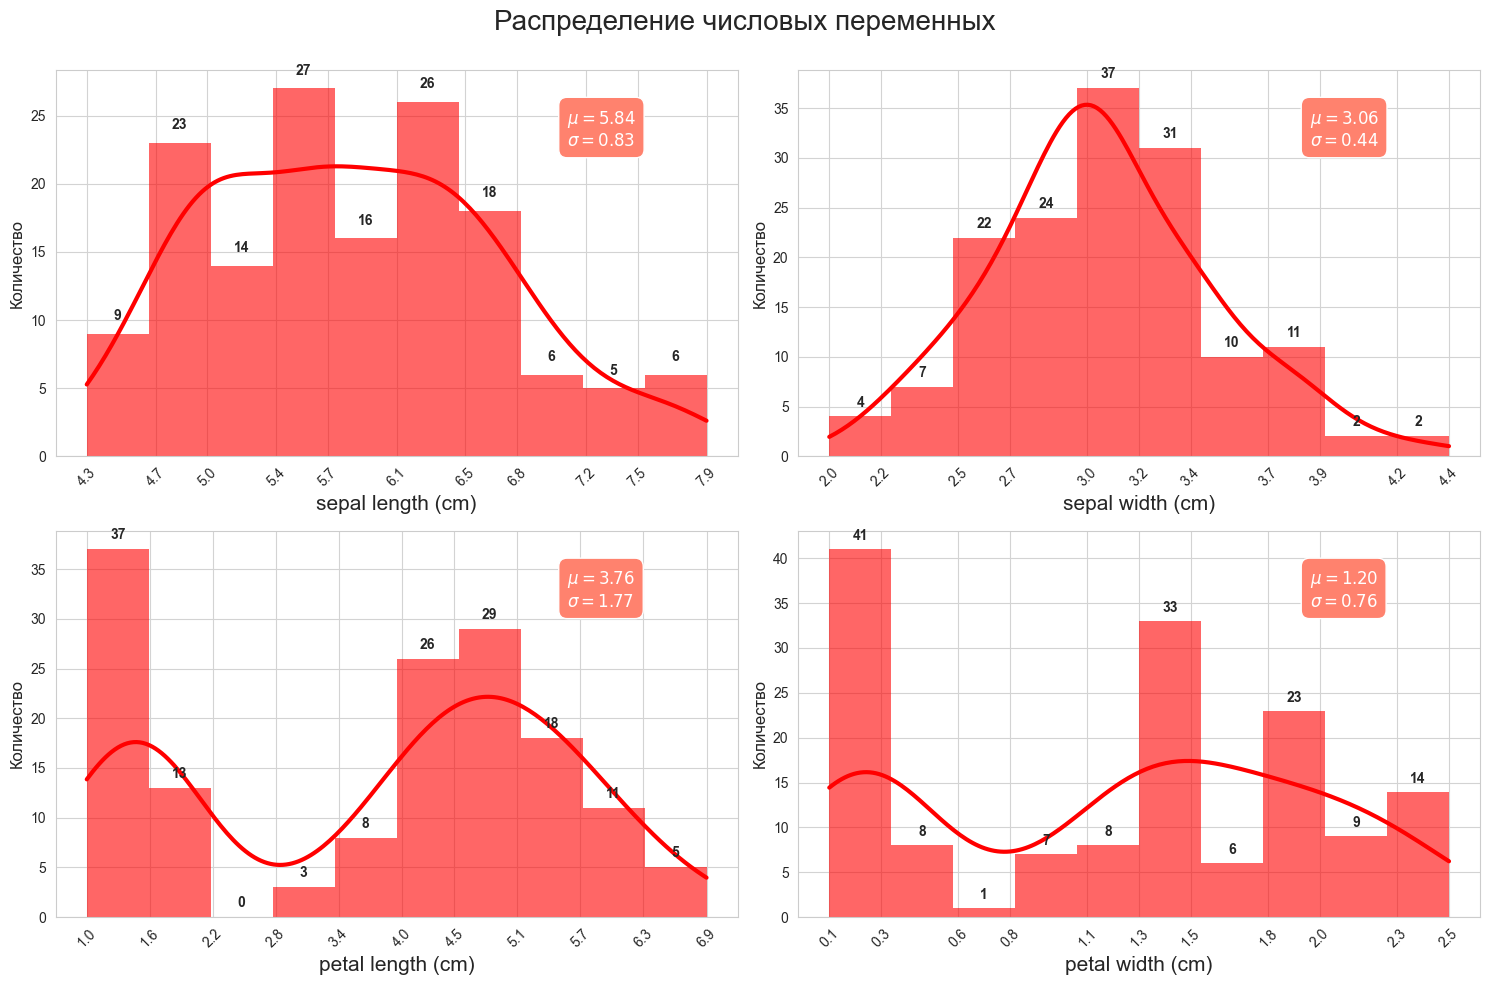

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df.columns):
    x = i // 2
    y = i % 2
    values, bin_edges = np.histogram(df[col],
                                     range=(df[col].min(), df[col].max()))

    graph = sns.histplot(data=df, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df[col].mean(),
        r'$\sigma=%.2f$' % df[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))


plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [15]:
target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

Данные содержат информацию по 3 типам Ириса, каждый тип представлен 50 записями. Данные распределены равномерно

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42,stratify=target)

In [34]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.fit_transform(x_test)

In [35]:
#Построим модель логистической регрессии с параметрами по умолчанию
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

lg = LogisticRegression()
lg.fit(x_train_scale, y_train)
y_pred_train = lg.predict(x_train_scale)
y_pred_test = lg.predict(x_test_scale)
print('classification report train')
print(classification_report(y_train, y_pred_train))
print('classification report test')
print(classification_report(y_test, y_pred_test))

classification report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.95      0.94        40
           2       0.95      0.93      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

classification report test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [37]:
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import LabelBinarizer

y_score = lg.predict_proba(x_test)

In [39]:
macro_roc_auc_ovr = roc_auc_score(y_test, y_score, multi_class="ovr", average="macro")

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.83


In [53]:
target_names = list(map(str, set(y)))
n_classes = len(np.unique(y))

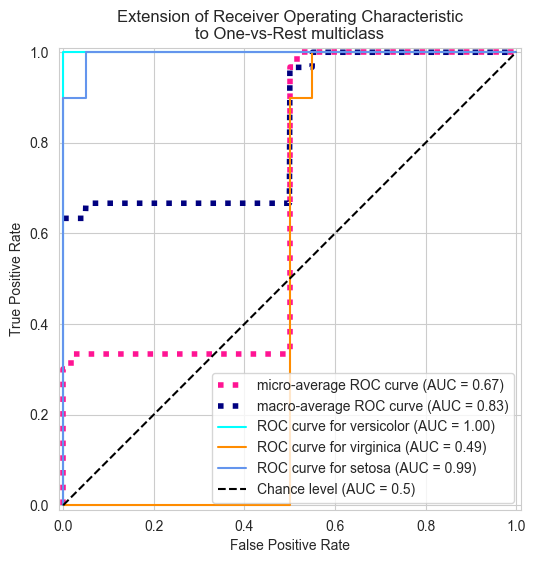

In [54]:
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

fpr, tpr, roc_auc = dict(), dict(), dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

В соответствии с classification report  точность модели достаточо высокая, как на тренировочной выборке (0.96), так и на тестовой (0.97).

Показатель ROC_AUC для построеннйо модели равен 0.83 при макро0усреднении и 0.67 при микроусреднении.
При этом из построенных графиков видно, что ROC auc для двух типов Ирисов очень высокая:
- versicolor - roc-auc = 1;
- setosa - roc-auc = 0.99;
- однако для virginica - roc-auc = 0.49, то есть модель не может прогнозировать адекватно этот класс.
